![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [19]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [20]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


Checar valores nulos y outliers

In [21]:
penguins_df.isna().sum()


culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [22]:
penguins_df.dropna(inplace=True)

In [23]:

penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


<AxesSubplot: >

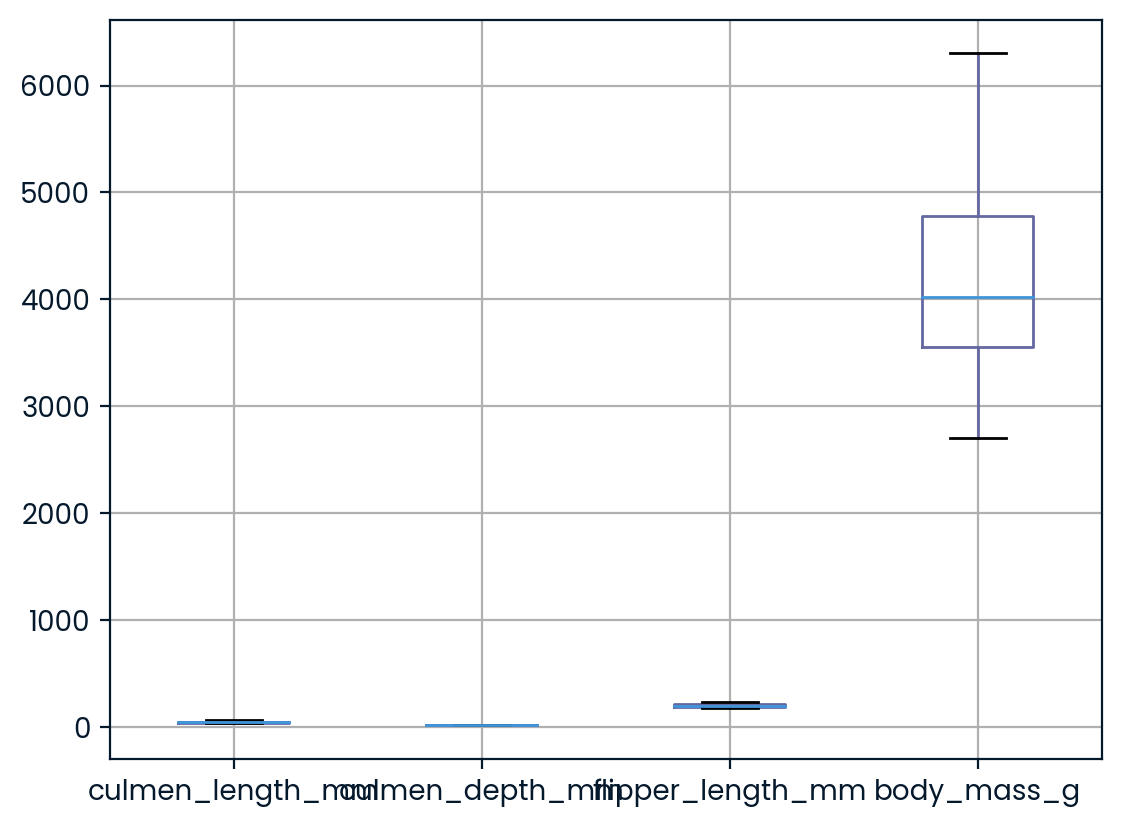

In [24]:
penguins_df.boxplot()


In [25]:
penguins_clean = penguins_df[(penguins_df['flipper_length_mm'] < 3000) & (penguins_df['flipper_length_mm'] > 0)]


In [26]:

penguins_clean.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


preprocesamiento de los datos para dummy variables

In [27]:
penguins_clean = pd.get_dummies(penguins_clean, drop_first=True)


preprocesamiento para escalar el dataset

In [28]:
scaler = StandardScaler()
penguins_preprocessed = scaler.fit_transform(penguins_clean)

aplicar pca

In [29]:
pca = PCA(n_components=None)
pca.fit(penguins_preprocessed)
pca.explained_variance_ratio_
n_components = sum(pca.explained_variance_ratio_>0.1)

pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

buscar el numero optimo de clusters para k medias

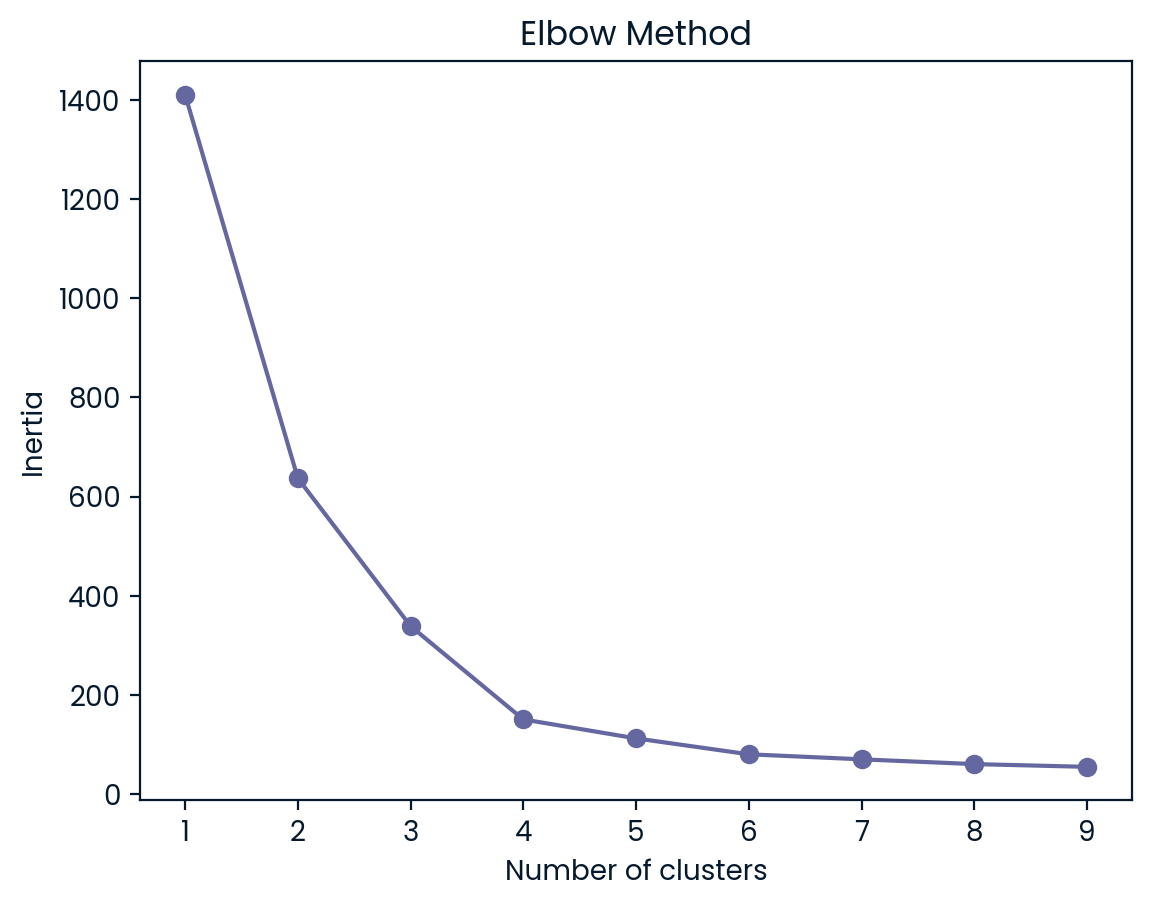

In [30]:
inertia = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()
n_clusters=4

correr el algoritmo de kmedias

In [31]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)


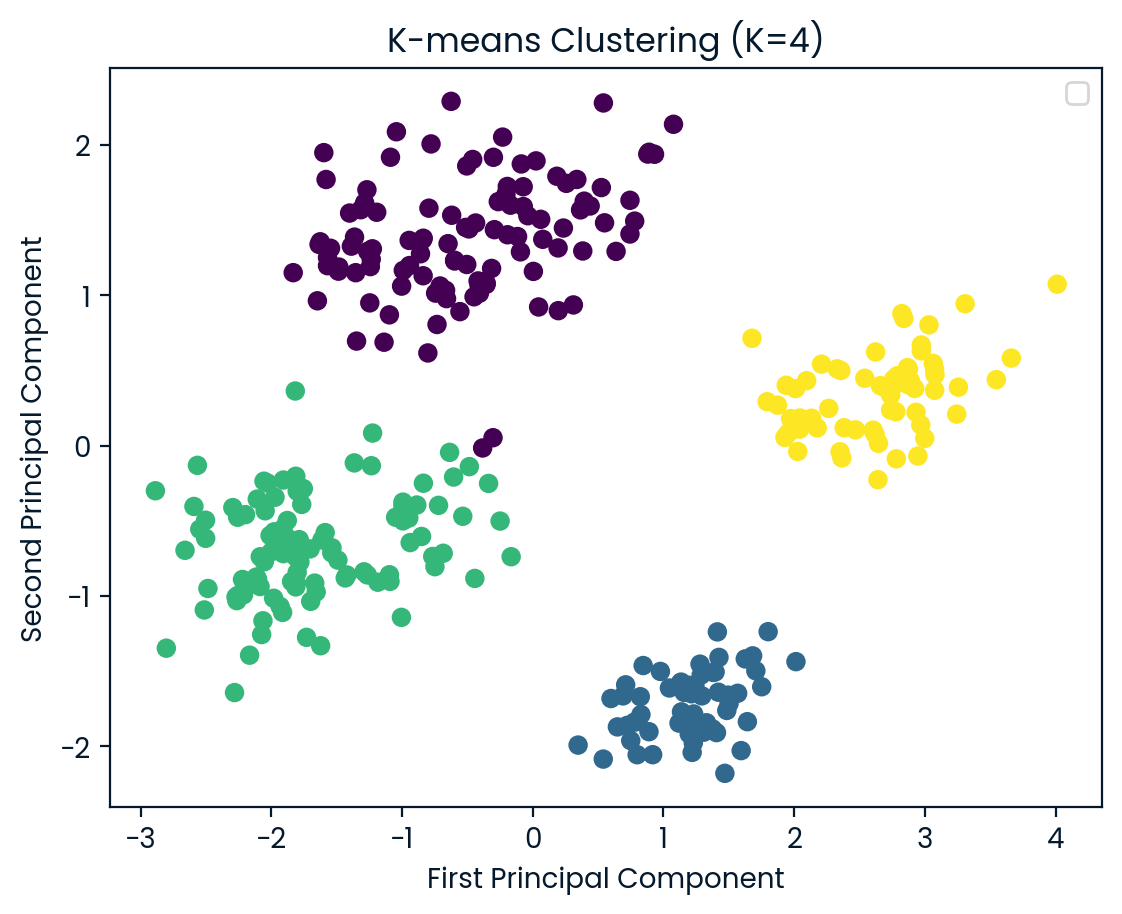

In [32]:
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()


crear un dataframe estadistico para cada cluster 

In [33]:
penguins_clean['label'] = kmeans.labels_

numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']

stat_penguins = penguins_clean.groupby('label')[numeric_columns].mean()

stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,label
label,,,,
0,44.067593,19.095370,194.666667,0.0
1,45.563793,14.237931,212.706897,1.0
2,39.953333,17.599048,189.038095,2.0
3,49.473770,15.718033,221.540984,3.0
